# Report

### Preprocessing 
setting up data to train baseline models of logistic regression and decision trees with all features

In [103]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.tree import export_graphviz


In [2]:
"""
# moving up a directory to access project folder
os.chdir('..')
"""

"\n# moving up a directory to access project folder\nos.chdir('..')\n"

In [3]:
""" 
grabbing csv from data folder and loading into df
csv_file_path = 'data/tiktok_dataset.csv'
tiktok_dataset = pd.read_csv(csv_file_path)
"""

" \ngrabbing csv from data folder and loading into df\ncsv_file_path = 'data/tiktok_dataset.csv'\ntiktok_dataset = pd.read_csv(csv_file_path)\n"

In [4]:

tiktok_dataset = pd.read_csv('tiktok_dataset.csv')

In [5]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


`variable name` | **type** | Description

`claim_status` | **obj**	| Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.

`video_id`	| **int**	| Random identifying number assigned to video upon publication on TikTok.

`video_duration_sec`| 	**int**	|  How long the published video is measured in seconds.

`video_transcription_text`	| **obj**	| Transcribed text of the words spoken in the published video.

`verified_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”

`author_ban_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”

`video_view_count`	| **float**	| The total number of times the published video has been viewed.

`video_like_count`	| **float** | The total number of times the published video has been liked by other users.

`video_share_count`	| **float** | The total number of times the published video has been shared by other users.

`video_download_count`| 	**float**| The total number of times the published video has been downloaded by other users.

`video_comment_count`		| **float**| The total number of comments on the published video.

In [6]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
tiktok_dataset['author_ban_status'].value_counts()

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

In [8]:
tiktok_dataset.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
tiktok_dataset = tiktok_dataset.dropna(axis=0)

In [10]:
tiktok_dataset.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [11]:
# Check for duplicates
tiktok_dataset.duplicated().sum()

np.int64(0)

In [12]:
tiktok_dataset.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [13]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [14]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [15]:
# binary classification: 'active user' vs 'suspicous user' (under review or banned)
tiktok_dataset['user_status'] = tiktok_dataset['author_ban_status'].apply(
                                                                        lambda x: 'active' 
                                                                        if x == 'active' else 'suspicious')

In [16]:
# sorting features
numeric_features = [
        'video_duration_sec', 
        'video_view_count', 
        'video_like_count', 
        'video_share_count', 
        'video_download_count', 
        'video_comment_count'
]

categorical_features = ['claim_status','verified_status']

text_features = ['video_transcription_text']


In [17]:
# setup for X and y
X = tiktok_dataset[numeric_features + categorical_features + text_features].copy()
y = LabelEncoder().fit_transform(tiktok_dataset['user_status'].copy())

In [18]:
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status,verified_status,video_transcription_text
0,59,343296.0,19425.0,241.0,1.0,0.0,claim,not verified,someone shared with me that drone deliveries a...
1,32,140877.0,77355.0,19034.0,1161.0,684.0,claim,not verified,someone shared with me that there are more mic...
2,31,902185.0,97690.0,2858.0,833.0,329.0,claim,not verified,someone shared with me that american industria...
3,25,437506.0,239954.0,34812.0,1234.0,584.0,claim,not verified,someone shared with me that the metro of st. p...
4,19,56167.0,34987.0,4110.0,547.0,152.0,claim,not verified,someone shared with me that the number of busi...


In [19]:
y[:5]

array([1, 0, 0, 0, 0])

In [20]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(15267, 9)

In [22]:
X_test.shape

(3817, 9)

In [23]:
# Preprocessing for numeric features
numeric_transformer = StandardScaler()
    
# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Preprocessing for text features
text_transformer = CountVectorizer(
    max_features=20,  # Limit to top 100 features
    stop_words='english',
    lowercase=True
)

In [24]:
# Check shapes of data before transformation
print(X_train[numeric_features].shape)
print(X_train[categorical_features].shape)
print(X_train['video_transcription_text'].shape)

# Apply transformations individually
numeric_data = numeric_transformer.fit_transform(X_train[numeric_features])
categorical_data = categorical_transformer.fit_transform(X_train[categorical_features])
text_data = text_transformer.fit_transform(X_train['video_transcription_text'])

# Check if transformed data has matching row counts
print(numeric_data.shape)
print(categorical_data.shape)
print(text_data.shape)


(15267, 6)
(15267, 2)
(15267,)
(15267, 6)
(15267, 2)
(15267, 20)


In [25]:
text_transformer.vocabulary_

{'learned': np.int64(11),
 'media': np.int64(12),
 'claim': np.int64(1),
 'colleagues': np.int64(3),
 'colleague': np.int64(2),
 'discovered': np.int64(4),
 'friends': np.int64(9),
 'family': np.int64(6),
 'world': np.int64(19),
 'online': np.int64(14),
 'internet': np.int64(10),
 'forum': np.int64(7),
 'view': np.int64(16),
 'friend': np.int64(8),
 'earth': np.int64(5),
 'read': np.int64(15),
 'news': np.int64(13),
 'board': np.int64(0),
 'website': np.int64(17),
 'willing': np.int64(18)}

In [26]:
# Get the vocabulary as a dictionary
vocab = text_transformer.vocabulary_

# Create text column names using the actual words
text_cols = [key for key, value in sorted(vocab.items(), key=lambda x: x[1])]

In [27]:
text_cols

['board',
 'claim',
 'colleague',
 'colleagues',
 'discovered',
 'earth',
 'family',
 'forum',
 'friend',
 'friends',
 'internet',
 'learned',
 'media',
 'news',
 'online',
 'read',
 'view',
 'website',
 'willing',
 'world']

In [28]:
# transformed df
X_transformed = np.hstack([
    numeric_data, 
    categorical_data, 
    text_data.toarray()
])


In [29]:

# Combine column names
numeric_cols = numeric_features
categorical_cols = categorical_transformer.get_feature_names_out(categorical_features)

transformed_columns = list(numeric_cols) + list(categorical_cols) + text_cols

In [30]:

# Create DataFrame
X_train_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)

In [31]:
X_train_transformed.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,verified_status_verified,board,claim,...,internet,learned,media,news,online,read,view,website,willing,world
0,0.840634,0.860305,1.383220,1.916528,2.279901,-0.404850,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.025259,-0.774693,-0.622519,-0.508266,-0.508593,-0.430014,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.332967,0.747300,-0.501922,-0.340870,-0.373979,-0.427497,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.332967,2.187249,-0.578011,-0.450047,-0.466214,-0.369621,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.963717,-0.763122,-0.617837,-0.521944,-0.523051,-0.440079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
numeric_test_data = numeric_transformer.transform(X_test[numeric_features])
categorical_test_data = categorical_transformer.transform(X_test[categorical_features])
text_test_data = text_transformer.transform(X_test['video_transcription_text'])

In [33]:
X_test_transformed = np.hstack([
    numeric_test_data, 
    categorical_test_data, 
    text_test_data.toarray()
])


In [34]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

In [35]:
X_test_transformed.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,verified_status_verified,board,claim,...,internet,learned,media,news,online,read,view,website,willing,world
0,-0.636366,-0.767150,-0.629768,-0.519253,-0.521555,-0.440079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.409842,1.560240,-0.322851,-0.169688,-0.138156,-0.260160,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.944074,1.112569,2.120786,3.034679,3.030745,4.954986,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.436408,0.339699,0.837450,-0.484008,0.270172,0.386543,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.682574,1.017803,0.016613,-0.298208,-0.092786,-0.413658,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# function to do a quick transformation for X and y similar to previous cells

def quick_transformation(df, numeric_features=numeric_features, categorical_features=categorical_features):
    X = df[numeric_features + categorical_features + text_features].copy()
    y = LabelEncoder().fit_transform(df['user_status'].copy())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    numeric_data = numeric_transformer.fit_transform(X_train[numeric_features])
    categorical_data = categorical_transformer.fit_transform(X_train[categorical_features])
    text_data = text_transformer.fit_transform(X_train['video_transcription_text'])

    vocab = text_transformer.vocabulary_
    text_cols = [key for key, value in sorted(vocab.items(), key=lambda x: x[1])]

    X_transformed = np.hstack([
        numeric_data, 
        categorical_data, 
        text_data.toarray()
    ])

    numeric_cols = numeric_features
    categorical_cols = categorical_transformer.get_feature_names_out(categorical_features)

    transformed_columns = list(numeric_cols) + list(categorical_cols) + text_cols
    X_train_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)

    numeric_test_data = numeric_transformer.transform(X_test[numeric_features])
    categorical_test_data = categorical_transformer.transform(X_test[categorical_features])
    text_test_data = text_transformer.transform(X_test['video_transcription_text'])

    X_test_transformed = np.hstack([
        numeric_test_data, 
        categorical_test_data, 
        text_test_data.toarray()
    ])

    X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

    return X_train_transformed, X_test_transformed, y_train, y_test



### Training Baseline
Using all features to make baseline model to measure performance

In [37]:
# Logistic Regression
lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000
)
lr_model.fit(X_train_transformed, y_train)
lr_predictions = lr_model.predict(X_test_transformed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", 
    classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.8053445113963846
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      3074
           1       0.00      0.00      0.00       743

    accuracy                           0.81      3817
   macro avg       0.40      0.50      0.45      3817
weighted avg       0.65      0.81      0.72      3817



/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [38]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)
dt_predictions = dt_model.predict(X_test_transformed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", 
    classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7144354204872937
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3074
           1       0.28      0.30      0.29       743

    accuracy                           0.71      3817
   macro avg       0.56      0.56      0.56      3817
weighted avg       0.72      0.71      0.72      3817



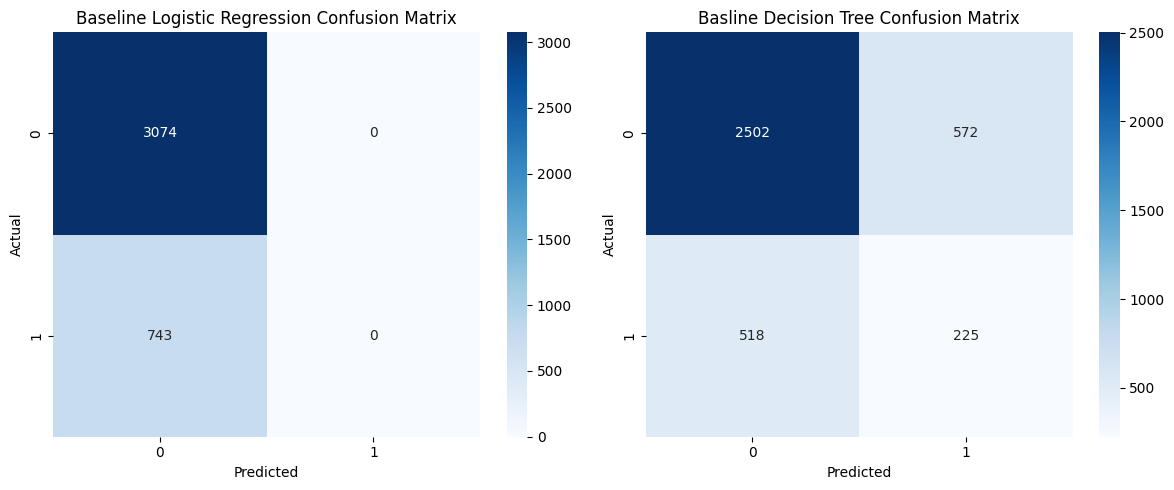

In [39]:

# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_predictions)
cm_dt = confusion_matrix(y_test, dt_predictions)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Basline Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### EDA
Understanding which features are to be excluded/included

In [40]:
tiktok_dataset.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### View Count

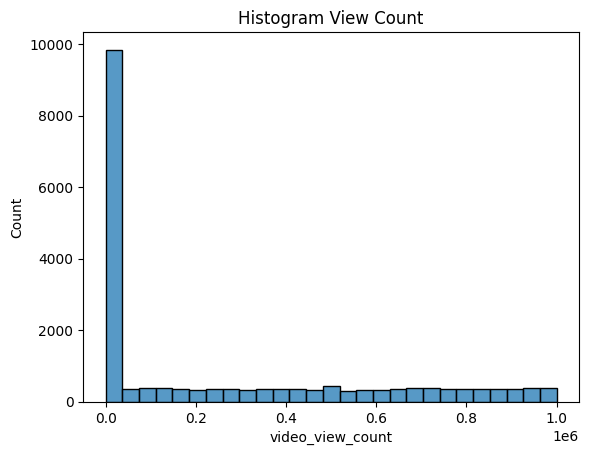

In [41]:
sns.histplot(tiktok_dataset['video_view_count'])
plt.title('Histogram View Count')
plt.show()

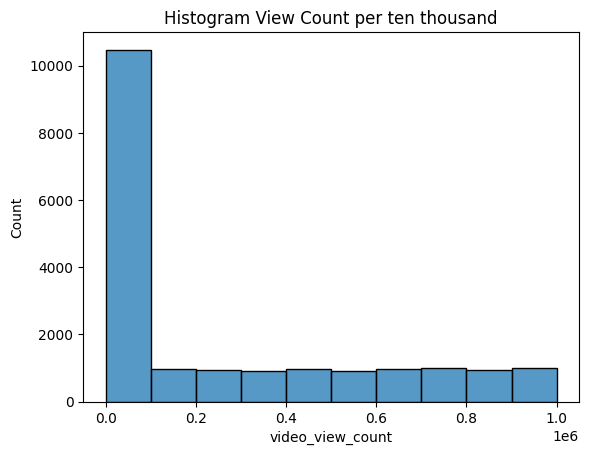

In [42]:
sns.histplot(tiktok_dataset['video_view_count'], bins=range(0, (10**6+1),10**5))
plt.title('Histogram View Count per ten thousand')
plt.show()

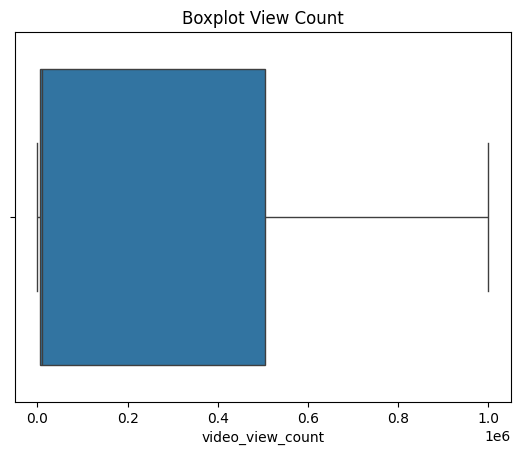

In [43]:
sns.boxplot(x=tiktok_dataset['video_view_count'])
plt.title('Boxplot View Count')
plt.show()


#### Duration

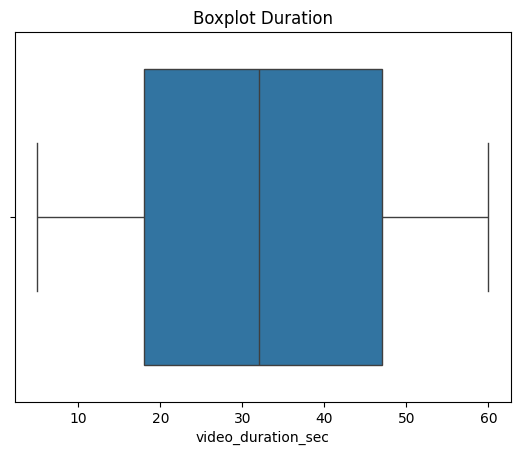

In [44]:

plt.title('Boxplot Duration')
sns.boxplot(x=tiktok_dataset['video_duration_sec']);

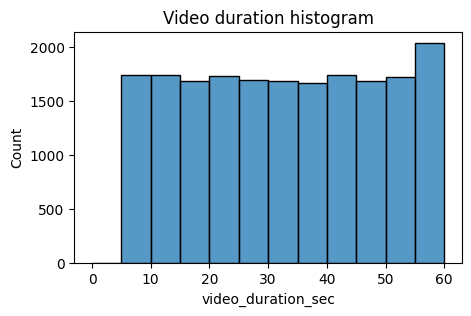

In [45]:
plt.figure(figsize=(5,3))
sns.histplot(tiktok_dataset['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

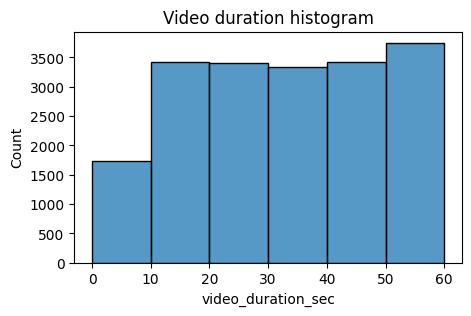

In [46]:
plt.figure(figsize=(5,3))
sns.histplot(tiktok_dataset['video_duration_sec'], bins=range(0,61,10))
plt.title('Video duration histogram');

#### Likes

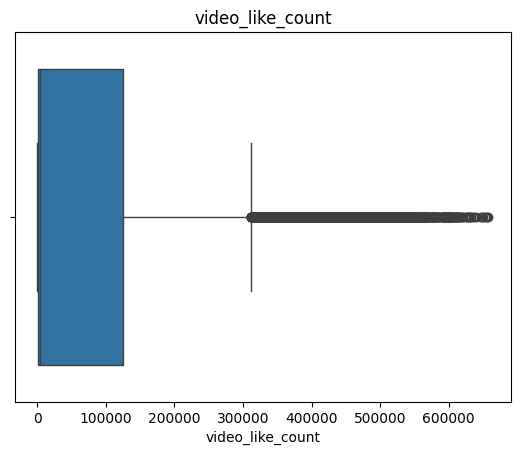

In [47]:
plt.title('video_like_count')
sns.boxplot(x=tiktok_dataset['video_like_count']);

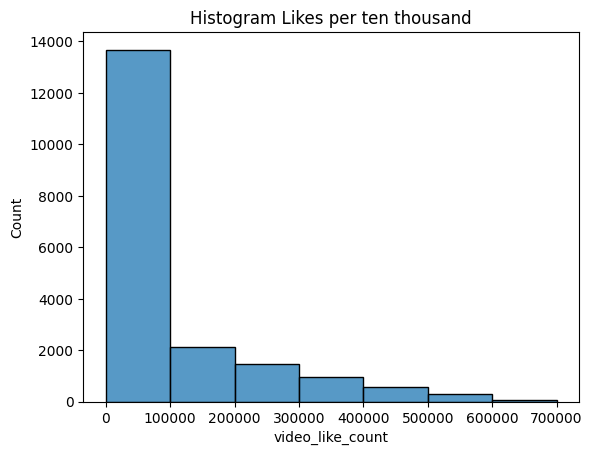

In [48]:
sns.histplot(tiktok_dataset['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Histogram Likes per ten thousand')
plt.show()

#### Comments

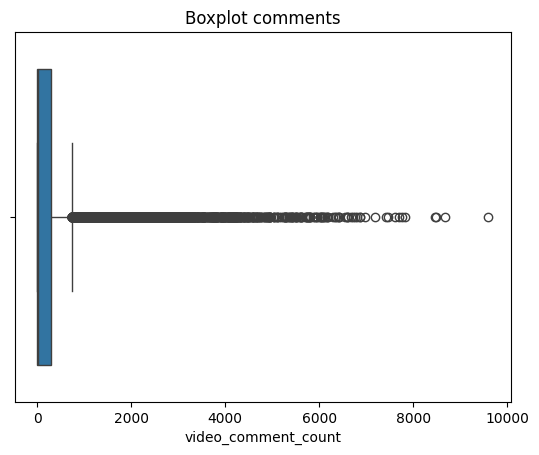

In [49]:
plt.title('Boxplot comments')
sns.boxplot(x=tiktok_dataset['video_comment_count']);

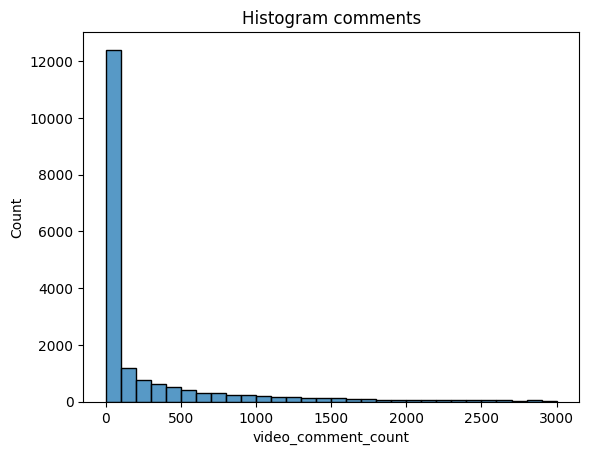

In [50]:
sns.histplot(tiktok_dataset['video_comment_count'], bins=range(0,(3001),100))
plt.title('Histogram comments');

#### Share

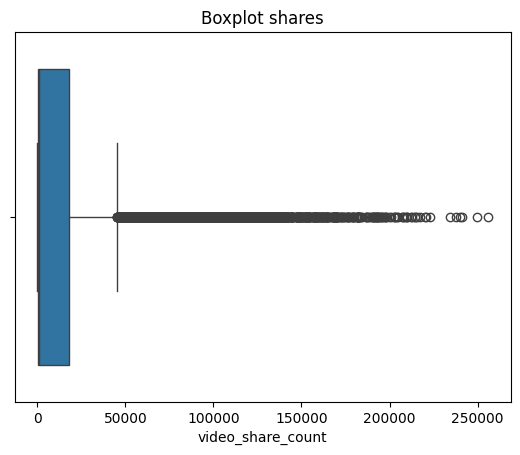

In [51]:
plt.title('Boxplot shares')
sns.boxplot(x=tiktok_dataset['video_share_count']);

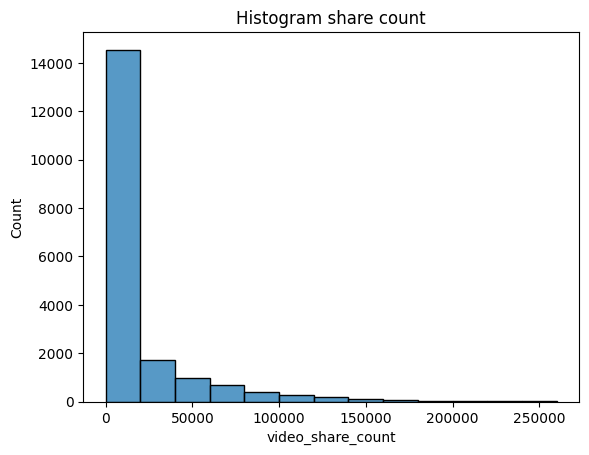

In [52]:
sns.histplot(tiktok_dataset['video_share_count'], bins=range(0,(270001),20000))
plt.title('Histogram share count');

#### Downloads

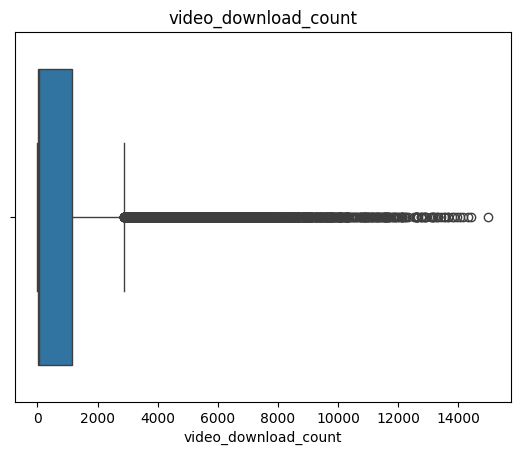

In [53]:
plt.title('video_download_count')
sns.boxplot(x=tiktok_dataset['video_download_count']);

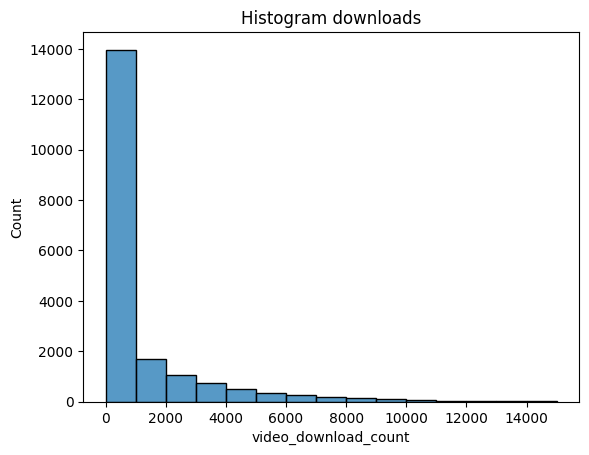

In [54]:
sns.histplot(tiktok_dataset['video_download_count'], bins=range(0,(15001),1000))
plt.title('Histogram downloads');

#### User status by claim

In [115]:
tiktok_dataset['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

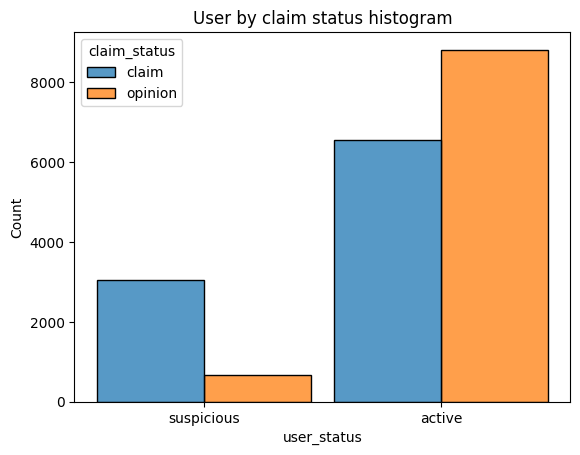

In [55]:
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='claim_status',
             multiple='dodge',
             shrink=0.9)
plt.title('User by claim status histogram');

#### User status by verification

In [117]:
tiktok_dataset['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

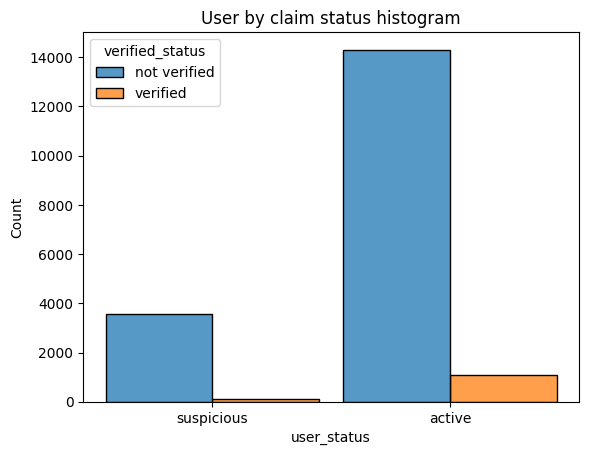

In [56]:
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('User by claim status histogram');

In [125]:

for col_name in ['claim_status', 'verified_status', 'user_status']:
    print(f"{col_name.replace('_', ' ').title()}:")  # Nicer title
    for value, count in tiktok_dataset[col_name].value_counts().items():
        print(f"  {value}: {count}")
    print()  # Add an empty line for separation

Claim Status:
  claim: 9608
  opinion: 9476

Verified Status:
  not verified: 17884
  verified: 1200

User Status:
  active: 15383
  suspicious: 3701



### Linear Regression Features

Need to deal with the following for Linear Regression:
* Outliers
* Multicollinearity
* Right-skewed data

In [57]:
lr_tiktok_data = tiktok_dataset.copy()

In [58]:
lr_tiktok_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,user_status
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,suspicious
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,active
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,active
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,active
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,active


#### Outliers

Varibles to take care of:
* Likes
* Comments
* Shares
* Download

In [59]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, factor=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    return data[(data < lower_bound) | (data > upper_bound)]


In [60]:

# Identify outliers in each column
outliers_views = detect_outliers_iqr(lr_tiktok_data['video_view_count'])
outliers_shares = detect_outliers_iqr(lr_tiktok_data['video_share_count'])
outliers_comments = detect_outliers_iqr(lr_tiktok_data['video_comment_count'])
outliers_comments = detect_outliers_iqr(lr_tiktok_data['video_download_count'])

In [61]:

# Combine outlier indices
outlier_indices = np.unique(np.concatenate((
    lr_tiktok_data[lr_tiktok_data['video_view_count'].isin(outliers_views)].index,
    lr_tiktok_data[lr_tiktok_data['video_share_count'].isin(outliers_shares)].index,
    lr_tiktok_data[lr_tiktok_data['video_comment_count'].isin(outliers_comments)].index,
    lr_tiktok_data[lr_tiktok_data['video_download_count'].isin(outliers_comments)].index
)))


In [62]:

# Remove rows with outliers
lr_tiktok_data_clean = lr_tiktok_data.drop(outlier_indices)

print("Original DataFrame:")
print(lr_tiktok_data.shape)

print("\nDataFrame after outlier removal (using IQR):")
print(lr_tiktok_data_clean.shape)

Original DataFrame:
(19084, 13)

DataFrame after outlier removal (using IQR):
(15581, 13)


#### Numerical Heatmap
Checking multicollinearity

In [63]:
lr_numeric_features = numeric_features.copy()
lr_tiktok_data_clean[lr_numeric_features]

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,59,343296.0,19425.0,241.0,1.0,0.0
1,32,140877.0,77355.0,19034.0,1161.0,684.0
2,31,902185.0,97690.0,2858.0,833.0,329.0
3,25,437506.0,239954.0,34812.0,1234.0,584.0
4,19,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...
19079,49,6067.0,423.0,81.0,8.0,2.0
19080,23,2973.0,820.0,70.0,3.0,0.0
19081,50,734.0,102.0,7.0,2.0,1.0
19082,8,3394.0,655.0,123.0,11.0,4.0


In [64]:
num_matrix = lr_tiktok_data_clean[lr_numeric_features].corr()

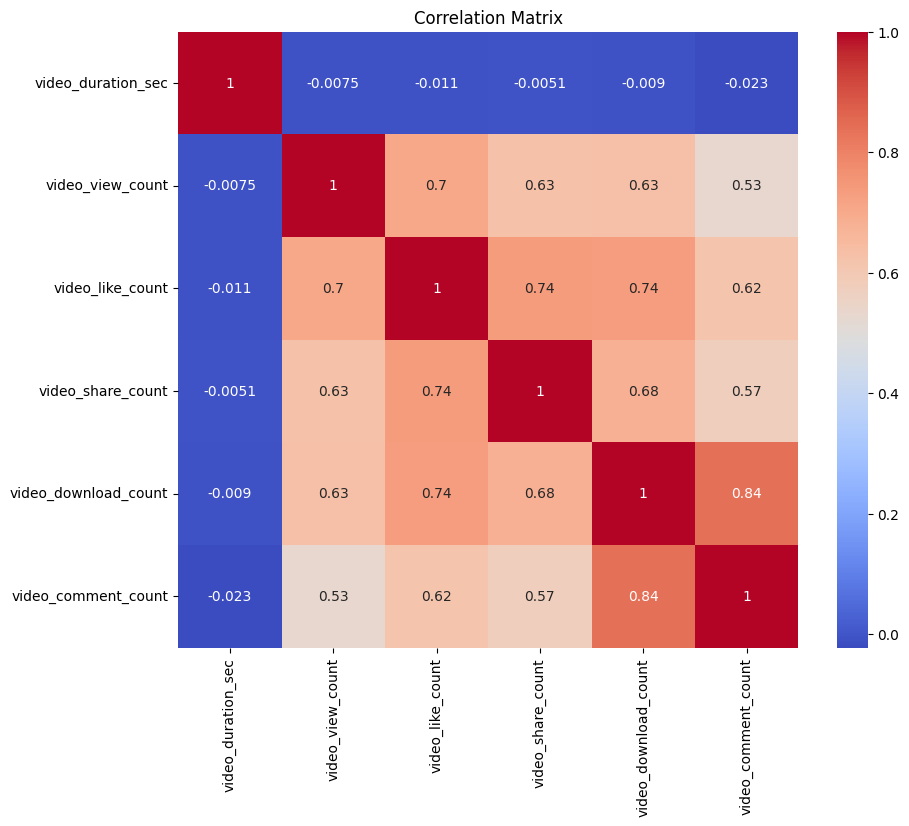

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(num_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Downloads and comments have high correlation while, other numeric values have moderate except for video duration. Downloads will be removed

In [66]:
lr_tiktok_data_clean.drop('video_download_count', axis=1, inplace=True)

In [67]:
lr_numeric_features.remove('video_download_count')

In [68]:
lr_numeric_features

['video_duration_sec',
 'video_view_count',
 'video_like_count',
 'video_share_count',
 'video_comment_count']

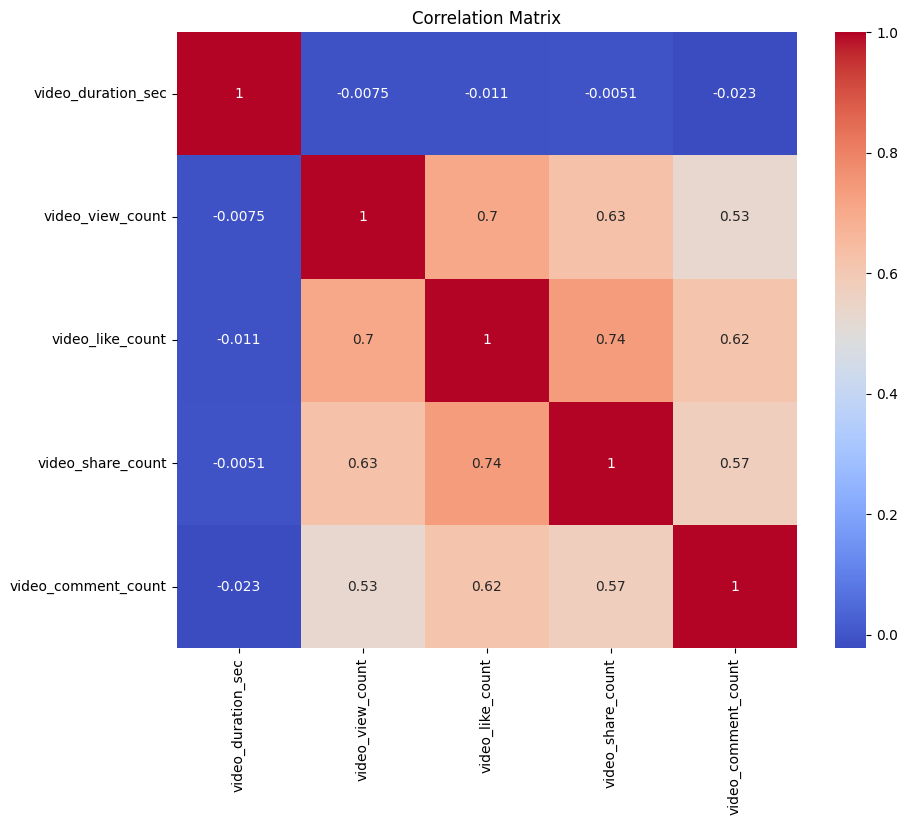

In [69]:
num_matrix = lr_tiktok_data_clean[lr_numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(num_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Right-skewed data


views, likes, shares, comments are all right skewed. Log transformation will be applied to handle

In [70]:
columns_to_transform = ['video_view_count','video_like_count', 'video_comment_count', 'video_share_count']


In [71]:
for column in columns_to_transform:
    lr_tiktok_data_clean[column] = np.log1p(lr_tiktok_data_clean[column]) 

In [72]:
lr_tiktok_data_clean.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_comment_count
count,15581.000000,1.558100e+04,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000
mean,10618.619922,5.625334e+09,32.275720,9.875190,8.086666,6.163966,2.357199
std,5398.289682,2.535837e+09,16.269879,2.325376,2.518618,2.569065,2.210754
min,1.000000,1.234959e+09,5.000000,3.044522,0.000000,0.000000,0.000000
25%,6177.000000,3.419956e+09,18.000000,8.305978,6.400257,4.369448,0.693147
50%,11294.000000,5.621881e+09,32.000000,9.001593,7.565793,5.874931,1.609438
75%,15189.000000,7.839411e+09,46.000000,12.332459,10.560723,8.468423,4.262680
max,19084.000000,9.999873e+09,60.000000,13.815166,13.331557,10.722496,7.497207


#### Retraining Logistic Regression

In [73]:
X_train_transformed_lr, X_test_transformed_lr, y_train_lr, y_test_lr = quick_transformation(lr_tiktok_data_clean, numeric_features=lr_numeric_features)

In [74]:
lr_model_01 = LogisticRegression(
    random_state=42, 
    max_iter=1000
)
lr_model_01.fit(X_train_transformed_lr, y_train_lr)
lr_predictions_01 = lr_model_01.predict(X_test_transformed_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test_lr, lr_predictions_01))
print("Logistic Regression Classification Report:\n", 
    classification_report(y_test_lr, lr_predictions_01))


Logistic Regression Accuracy: 0.8408726339428938
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2621
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3117
   macro avg       0.42      0.50      0.46      3117
weighted avg       0.71      0.84      0.77      3117



/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

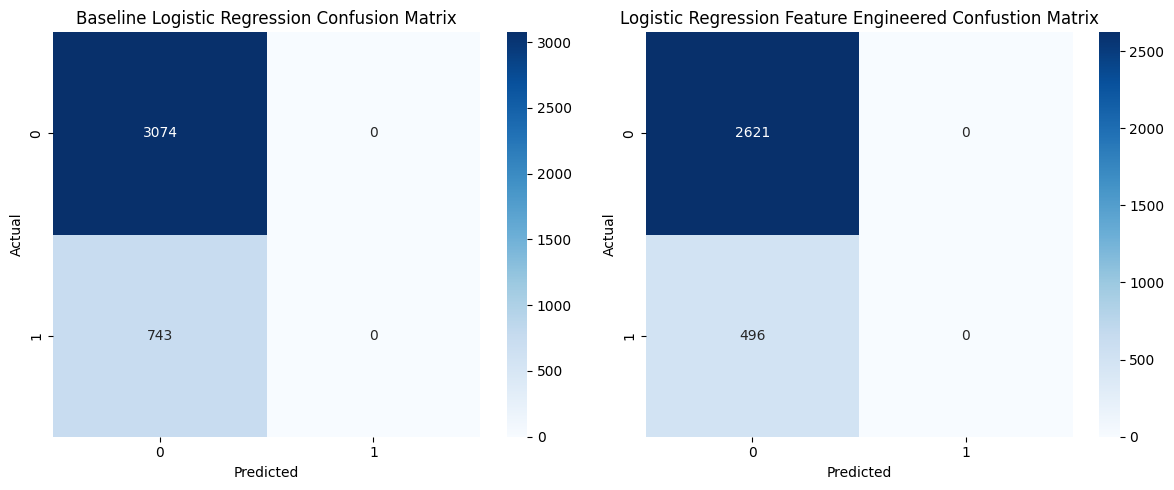

In [75]:

cm_lr_01 = confusion_matrix(y_test_lr, lr_predictions_01)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_lr_01, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Feature Engineered Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Decision Tree Features

Improving decision tree by pruning from feature importances

In [76]:
print("Feature importances:\n{}".format(dt_model.feature_importances_))


Feature importances:
[0.08281806 0.25754091 0.13621441 0.1427556  0.12029805 0.11299735
 0.00052094 0.00447649 0.0080176  0.00935231 0.01077669 0.0038986
 0.00901322 0.01180233 0.00522047 0.00220825 0.00796393 0.00316959
 0.00449669 0.0081253  0.01117337 0.01094447 0.00672238 0.00904988
 0.00267159 0.00537768 0.00212749 0.01026635]


In [77]:
dt_model.feature_importances_.shape

(28,)

In [78]:
dt_features = numeric_features+categorical_features+text_cols

In [79]:
def sort_dictionary_by_value(dictionary):
    """Sorts a dictionary by value from greatest to least.

    Args:
        dictionary: The dictionary to be sorted.

    Returns:
        A new dictionary with the same keys and values, sorted by value in descending order.
    """

    sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

importance_dic = {}
for key, value in zip(dt_features, dt_model.feature_importances_):
    importance_dic[str(key)] = float(value)

sorted_importance_dic = sort_dictionary_by_value(importance_dic)

for key, value in sorted_importance_dic.items():
    print(f"{key}: {value}")

video_view_count: 0.2575409134111041
video_share_count: 0.1427555971921411
video_like_count: 0.13621440527881182
video_download_count: 0.12029805125757978
video_comment_count: 0.11299735063210793
video_duration_sec: 0.08281806063023332
earth: 0.011802328987413672
media: 0.011173365118800665
news: 0.01094446678067315
colleague: 0.010776688294466617
world: 0.010266351341472054
claim: 0.00935231386419658
read: 0.009049880886665388
discovered: 0.009013220301443314
learned: 0.00812530440309658
board: 0.008017602333875516
friend: 0.007963932035992292
online: 0.006722377092580572
website: 0.005377677741272995
family: 0.0052204731928094
internet: 0.004496685165270924
verified_status: 0.004476490792693498
colleagues: 0.003898599413323672
friends: 0.003169592949938317
view: 0.0026715870277617586
forum: 0.0022082485092614463
willing: 0.0021274909682092264
claim_status: 0.0005209443968043648


(-1.0, 28.0)

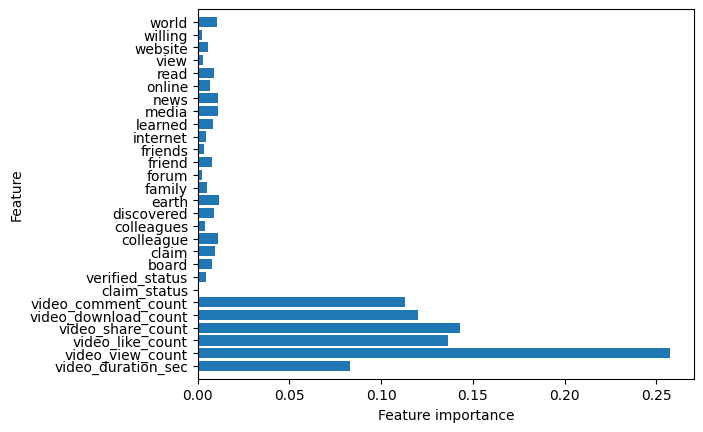

In [80]:
n_features = len(dt_features)
plt.barh(range(n_features), dt_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dt_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

6 features are are about .05 and 5 are above 6 are above .1. Will adjust max dept to 5 and 6

#### Pre-prunning

In [81]:
X_train_transformed_dt, X_test_transformed_dt, y_train_dt, y_test_dt = quick_transformation(tiktok_dataset)

In [82]:
dt_model_01 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model_01.fit(X_train_transformed_dt, y_train_dt)
dt_predictions_01 = dt_model_01.predict(X_test_transformed_dt)
print("Decision Tree Accuracy:", accuracy_score(y_test_dt, dt_predictions_01))
print("Decision Tree Classification Report:\n", 
    classification_report(y_test_dt, dt_predictions_01))

Decision Tree Accuracy: 0.8037725962798009
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      3074
           1       0.39      0.01      0.03       743

    accuracy                           0.80      3817
   macro avg       0.60      0.50      0.46      3817
weighted avg       0.73      0.80      0.72      3817



In [83]:
dt_model_02 = DecisionTreeClassifier(max_depth=6,random_state=42)
dt_model_02.fit(X_train_transformed, y_train)
dt_predictions_02 = dt_model_02.predict(X_test_transformed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions_02))
print("Decision Tree Classification Report:\n", 
    classification_report(y_test, dt_predictions_02))

Decision Tree Accuracy: 0.803248624574273
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      3074
           1       0.36      0.01      0.03       743

    accuracy                           0.80      3817
   macro avg       0.58      0.50      0.46      3817
weighted avg       0.72      0.80      0.72      3817



In [84]:
def quick_predictions(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Decision Tree Accuracy:", accuracy_score(y_test, pred))
    print("Decision Tree Classification Report:\n", 
        classification_report(y_test, pred))
    return pred


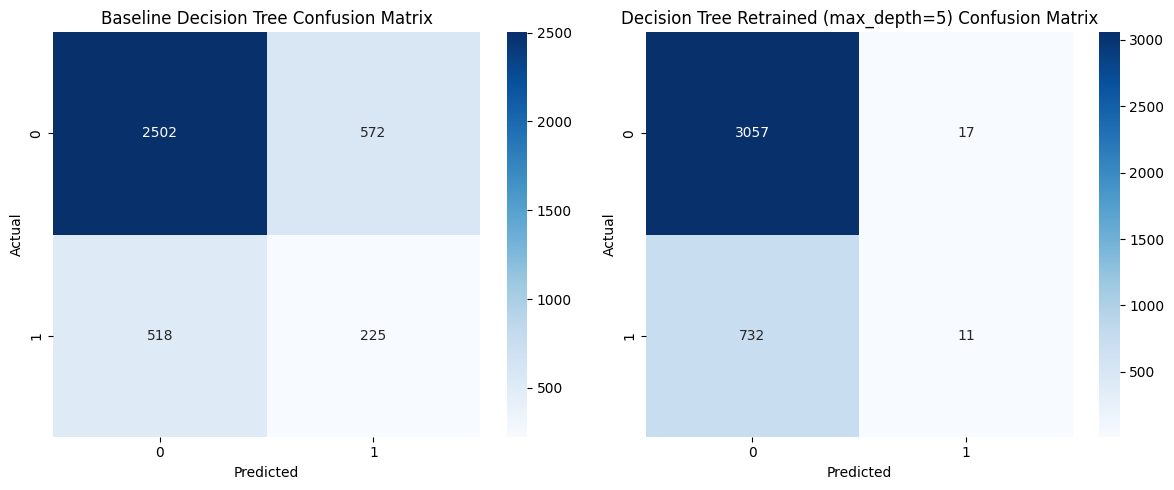

In [85]:


cm_dt_01 = confusion_matrix(y_test_dt, dt_predictions_01)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_01, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Retrained (max_depth=5) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Both models have the same technique of predicting all values as 0. Resampling for y values since the imbalance of target values

In [86]:

count_zeros = np.count_nonzero(y == 0)
count_ones = np.count_nonzero(y == 1)

print("Number of zeros:", count_zeros)
print("Number of ones:", count_ones)


Number of zeros: 15383
Number of ones: 3701


### Resampling

Will use SMOTE for over_sampling, Random under sampler for under sampling, and
SMOTEENN for combo
Need to resample on training data only

In [87]:
# Used gemini to adjust previous func to meet the above
def quick_transformation_w_resampling(df, numeric_features=numeric_features, categorical_features=categorical_features, text_features=text_features, scale=True):
    X = df[numeric_features + categorical_features + text_features].copy()
    y = LabelEncoder().fit_transform(df['user_status'].copy())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- ENCODING ---
    numeric_train = X_train[numeric_features].copy()
    categorical_train = X_train[categorical_features].copy()
    text_train = X_train['video_transcription_text'].copy()

    categorical_transformer.fit(categorical_train)
    categorical_data = categorical_transformer.transform(categorical_train)

    text_transformer.fit(text_train)
    text_data = text_transformer.transform(text_train)

    vocab = text_transformer.vocabulary_
    text_cols = [key for key, value in sorted(vocab.items(), key=lambda x: x[1])]

    # --- RESAMPLING ---
    X_train_encoded = np.hstack([numeric_train, categorical_data, text_data.toarray()])
    transformed_columns = list(numeric_features) + list(categorical_transformer.get_feature_names_out(categorical_features)) + text_cols
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=transformed_columns)
    
    smote = SMOTE(random_state=42)
    rus = RandomUnderSampler(random_state=42)
    smoteenn = SMOTEENN(random_state=42)

    X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded_df, y_train)
    X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded_df, y_train)
    X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_encoded_df, y_train)

    X_train_smote = pd.DataFrame(X_train_smote, columns=transformed_columns)
    X_train_rus = pd.DataFrame(X_train_rus, columns=transformed_columns)
    X_train_smoteenn = pd.DataFrame(X_train_smoteenn, columns=transformed_columns)

    # --- SCALING (Conditional)---
    if scale:
        numeric_transformer.fit(X_train_smote[numeric_features])
        numeric_data_smote = numeric_transformer.transform(X_train_smote[numeric_features])

        numeric_transformer.fit(X_train_rus[numeric_features])
        numeric_data_rus = numeric_transformer.transform(X_train_rus[numeric_features])

        numeric_transformer.fit(X_train_smoteenn[numeric_features])
        numeric_data_smoteenn = numeric_transformer.transform(X_train_smoteenn[numeric_features])

        X_train_smote = np.hstack([numeric_data_smote, X_train_smote.drop(columns=numeric_features).values])
        X_train_rus = np.hstack([numeric_data_rus, X_train_rus.drop(columns=numeric_features).values])
        X_train_smoteenn = np.hstack([numeric_data_smoteenn, X_train_smoteenn.drop(columns=numeric_features).values])

        X_train_smote = pd.DataFrame(X_train_smote, columns=transformed_columns)
        X_train_rus = pd.DataFrame(X_train_rus, columns=transformed_columns)
        X_train_smoteenn = pd.DataFrame(X_train_smoteenn, columns=transformed_columns)
    else:
        numeric_data_smote = X_train_smote[numeric_features].values
        numeric_data_rus = X_train_rus[numeric_features].values
        numeric_data_smoteenn = X_train_smoteenn[numeric_features].values
        
        X_train_smote = np.hstack([numeric_data_smote, X_train_smote.drop(columns=numeric_features).values])
        X_train_rus = np.hstack([numeric_data_rus, X_train_rus.drop(columns=numeric_features).values])
        X_train_smoteenn = np.hstack([numeric_data_smoteenn, X_train_smoteenn.drop(columns=numeric_features).values])

        X_train_smote = pd.DataFrame(X_train_smote, columns=transformed_columns)
        X_train_rus = pd.DataFrame(X_train_rus, columns=transformed_columns)
        X_train_smoteenn = pd.DataFrame(X_train_smoteenn, columns=transformed_columns)

    # --- TEST DATA TRANSFORMATION ---
    if scale:
        numeric_test_data = numeric_transformer.transform(X_test[numeric_features])
    else:
        numeric_test_data = X_test[numeric_features].values
    categorical_test_data = categorical_transformer.transform(X_test[categorical_features])
    text_test_data = text_transformer.transform(X_test['video_transcription_text'])

    X_test_transformed = np.hstack([numeric_test_data, categorical_test_data, text_test_data.toarray()])
    X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

    return X_train_smote, y_train_smote, X_train_rus, y_train_rus, X_train_smoteenn, y_train_smoteenn, X_test_transformed, y_test

In [88]:

X_train_smote_lr, y_train_smote_lr, X_train_rus_lr, y_train_rus_lr, X_train_smoteenn_lr, y_train_smoteenn_lr, X_test_transformed_lr, y_test_lr = quick_transformation_w_resampling(tiktok_dataset, scale=False)


/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarnin

In [89]:
lr_model_02 = LogisticRegression(random_state=42, max_iter=10000)
# Evaluate on SMOTE resampled data
predictions_smote = quick_predictions(lr_model_02, X_train_smote_lr, y_train_smote_lr, X_test_transformed_lr, y_test_lr)

Decision Tree Accuracy: 0.6313859051611213
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.58      0.72      3077
           1       0.32      0.82      0.46       740

    accuracy                           0.63      3817
   macro avg       0.63      0.70      0.59      3817
weighted avg       0.81      0.63      0.67      3817



In [90]:
lr_model_03 = LogisticRegression(random_state=42, max_iter=10000)
# Evaluate on RUS resampled data
predictions_rus = quick_predictions(lr_model_03, X_train_rus_lr, y_train_rus_lr, X_test_transformed_lr, y_test_lr)

Decision Tree Accuracy: 0.6313859051611213
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.58      0.72      3077
           1       0.32      0.82      0.46       740

    accuracy                           0.63      3817
   macro avg       0.63      0.70      0.59      3817
weighted avg       0.81      0.63      0.67      3817



In [91]:
lr_model_04 = LogisticRegression(solver='liblinear',random_state=42, max_iter=1000)
# Evaluate on SMOTEENN resampled data
predictions_smoteenn = quick_predictions(lr_model_04, X_train_smoteenn_lr, y_train_smoteenn_lr, X_test_transformed_lr, y_test_lr)

Decision Tree Accuracy: 0.5260675923500131
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.44      0.60      3077
           1       0.27      0.87      0.42       740

    accuracy                           0.53      3817
   macro avg       0.60      0.66      0.51      3817
weighted avg       0.81      0.53      0.57      3817



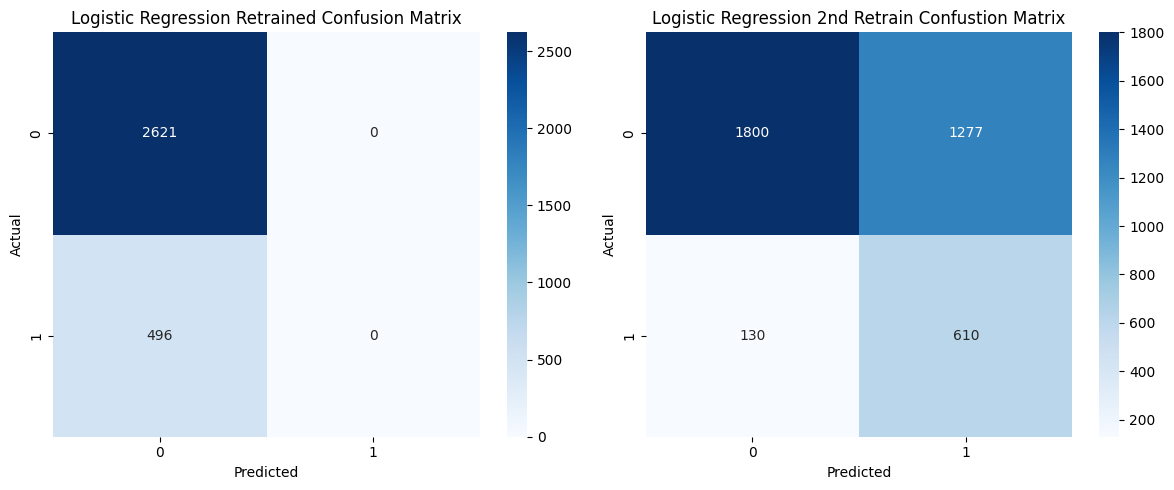

In [92]:
cm_lr_02 = confusion_matrix(y_test_lr, predictions_smote)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr_01, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Retrained Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_lr_02, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression 2nd Retrain Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

#### Decision Tree Resampling


In [93]:
X_train_smote_dt, y_train_smote_dt, X_train_rus_dt, y_train_rus_dt, X_train_smoteenn_dt, y_train_smoteenn_dt, X_test_transformed_dt, y_test_dt = quick_transformation_w_resampling(tiktok_dataset, scale=False)


/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarnin

In [94]:
dt_model_03 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model_04 = DecisionTreeClassifier(max_depth=6,random_state=42)
# Evaluate on SMOTE resampled data
predictions_smote_dt0 = quick_predictions(dt_model_03, X_train_smote_dt, y_train_smote_dt, X_test_transformed_dt, y_test_dt)
predictions_smote_dt1 = quick_predictions(dt_model_04, X_train_smote_dt, y_train_smote_dt, X_test_transformed_dt, y_test_dt)

Decision Tree Accuracy: 0.7031700288184438
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      3077
           1       0.32      0.46      0.38       740

    accuracy                           0.70      3817
   macro avg       0.59      0.61      0.59      3817
weighted avg       0.75      0.70      0.72      3817

Decision Tree Accuracy: 0.7550432276657061
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      3077
           1       0.31      0.22      0.26       740

    accuracy                           0.76      3817
   macro avg       0.57      0.55      0.56      3817
weighted avg       0.73      0.76      0.74      3817



In [95]:
dt_model_05 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model_06 = DecisionTreeClassifier(max_depth=6,random_state=42)

# Evaluate on RUS resampled data
predictions_rus_dt0 = quick_predictions(dt_model_05, X_train_rus_dt, y_train_rus_dt, X_test_transformed_dt, y_test_dt)
predictions_rus_dt1 = quick_predictions(dt_model_06, X_train_rus_dt, y_train_rus_dt, X_test_transformed_dt, y_test_dt)

Decision Tree Accuracy: 0.6290280324862457
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      3077
           1       0.32      0.78      0.45       740

    accuracy                           0.63      3817
   macro avg       0.62      0.69      0.59      3817
weighted avg       0.80      0.63      0.67      3817

Decision Tree Accuracy: 0.6350537070998166
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      3077
           1       0.32      0.76      0.45       740

    accuracy                           0.64      3817
   macro avg       0.61      0.68      0.59      3817
weighted avg       0.80      0.64      0.67      3817



In [96]:
dt_model_07 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model_08 = DecisionTreeClassifier(max_depth=6,random_state=42)

# Evaluate on SMOTEENN resampled data
predictions_smoteenn_dt0 = quick_predictions(dt_model_07, X_train_smoteenn_dt, y_train_smoteenn_dt, X_test_transformed_dt, y_test_dt)
predictions_smoteenn_dt1 = quick_predictions(dt_model_08, X_train_smoteenn_dt, y_train_smoteenn_dt, X_test_transformed_dt, y_test_dt)

Decision Tree Accuracy: 0.6402934241550956
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      3077
           1       0.32      0.79      0.46       740

    accuracy                           0.64      3817
   macro avg       0.62      0.70      0.59      3817
weighted avg       0.81      0.64      0.68      3817

Decision Tree Accuracy: 0.6478910138852502
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74      3077
           1       0.33      0.76      0.46       740

    accuracy                           0.65      3817
   macro avg       0.62      0.69      0.60      3817
weighted avg       0.80      0.65      0.68      3817



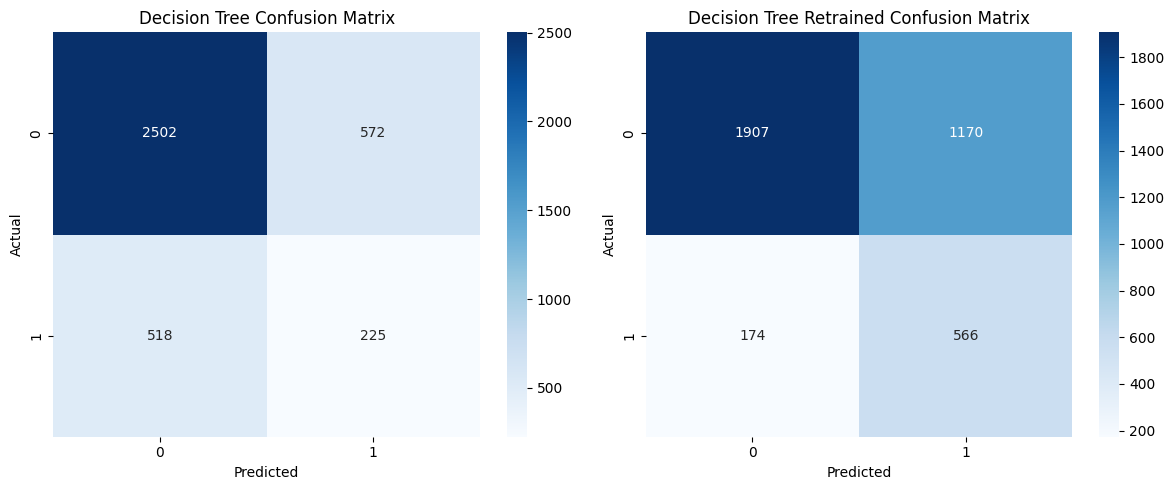

In [97]:
cm_dt_02 = confusion_matrix(y_test_dt, predictions_smoteenn_dt1)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_02, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Retrained Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Metrics


In [98]:
# Used chatgpt to get all data from classification reports, should have done more programmatically
data = {
    "Model": [
        "Baseline Logistic Regression", "Logistic Regression (Features Engineered)", "Logistic Regression (Features Engineered)",
        "Logistic Regression (Features Engineered)", "Logistic Regression (Features Engineered)", "Baseline Decision Tree",
        "Decision Tree (max_depth=5)", "Decision Tree (max_depth=6)", "Decision Tree(max_depth=5)",
        "Decision Tree(max_depth=5)", "Decision Tree(max_depth=5)", "Decision Tree (max_depth=6)", "Decision Tree (max_depth=6)",
        "Decision Tree (max_depth=6)"
    ],
    "Resampling": [
        "None", "None", "SMOTE", "RUS", "SMOTEENN", "None", 
        "None", "None", "SMOTE", "SMOTE", "RUS", "RUS", "SMOTEENN", "SMOTEENN"
    ],
    "Accuracy": [
        0.805, 0.841, 0.631, 0.631, 0.526, 0.714,
        0.804, 0.803, 0.703, 0.755, 0.629, 0.635, 0.640, 0.647
    ],
    "Precision (Class 0)": [
        0.81, 0.84, 0.93, 0.93, 0.93, 0.83,
        0.81, 0.81, 0.85, 0.83, 0.92, 0.91, 0.92, .92
    ],
    "Recall (Class 0)": [
        1.00, 1.00, 0.58, 0.58, 0.44, 0.81,
        0.99, 0.99, 0.76, 0.88, 0.59, 0.61, 0.61, 0.62
    ],
    "F1 (Class 0)": [
        0.89, 0.91, 0.72, 0.72, 0.60, 0.82,
        0.89, 0.89, 0.81 , 0.85 , 0.72 , 0.73 , 0.73 , 0.74
    ],
    "Precision (Class 1)": [
        0.00, 0.00, 0.32, 0.32, 0.27, 0.28,
        0.39, 0.36, 0.32 , 0.31 , 0.32 , 0.32 , 0.32 , 0.33
    ],
    "Recall (Class 1)": [
        0.00, 0.00, 0.82, 0.82, 0.87, 0.30,
        0.01, 0.01, 0.46 , 0.22 , 0.78 , 0.76 , 0.79 , 0.76
    ],
    "F1 (Class 1)": [
        0.00, 0.00, 0.46, 0.46, 0.42, 0.29,
        0.03, 0.03, 0.38 , 0.26 , 0.45 , 0.45 , 0.46 , 0.46
    ],
    "Macro Precision": [
        0.40, 0.42, 0.63, 0.63, 0.60, 0.56,
        0.60, 0.58, 0.59 , 0.57 , 0.62 , 0.61 , 0.62 , 0.62
    ],
    "Macro Recall": [
        0.50, 0.50, 0.70, 0.70, 0.66, 0.56,
        0.50, 0.50, 0.61 , 0.55 , 0.69 , 0.68 , 0.70 , 0.69
    ],
    "Macro F1": [
        0.45, 0.46, 0.59, 0.59, 0.51, 0.56,
        0.46, 0.46, 0.59 , 0.56 , 0.59 , 0.59 , 0.59 , 0.60
    ]
}

In [99]:
df = pd.DataFrame(data)
df

,Model,Resampling,Accuracy,Precision (Class 0),Recall (Class 0),F1 (Class 0),Precision (Class 1),Recall (Class 1),F1 (Class 1),Macro Precision,Macro Recall,Macro F1
0,Baseline Logistic Regression,None,0.805,0.81,1.00,0.89,0.00,0.00,0.00,0.40,0.50,0.45
1,Logistic Regression (Features Engineered),None,0.841,0.84,1.00,0.91,0.00,0.00,0.00,0.42,0.50,0.46
2,Logistic Regression (Features Engineered),SMOTE,0.631,0.93,0.58,0.72,0.32,0.82,0.46,0.63,0.70,0.59
3,Logistic Regression (Features Engineered),RUS,0.631,0.93,0.58,0.72,0.32,0.82,0.46,0.63,0.70,0.59
4,Logistic Regression (Features Engineered),SMOTEENN,0.526,0.93,0.44,0.60,0.27,0.87,0.42,0.60,0.66,0.51
5,Baseline Decision Tree,None,0.714,0.83,0.81,0.82,0.28,0.30,0.29,0.56,0.56,0.56
6,Decision Tree (max_depth=5),None,0.804,0.81,0.99,0.89,0.39,0.01,0.03,0.60,0.50,0.46
7,Decision Tree (max_depth=6),None,0.803,0.81,0.99,0.89,0.36,0.01,0.03,0.58,0.50,0.46
8,Decision Tree(max_depth=5),SMOTE,0.703,0.85,0.76,0.81,0.32,0.46,0.38,0.59,0.61,0.59
9,Decision Tree(max_depth=5),SMOTE,0.755,0.83,0.88,0.85,0.31,0.22,0.26,0.57,0.55,0.56


#### Visualizations for report


In [100]:
export_graphviz(
    dt_model_08,
    out_file="tree.dot",
    feature_names=transformed_columns,  # List of feature names used in the model
    class_names=["Not Suspicious", "Suspicious"],  # Adjust based on your target variable
    filled=True,  # Color nodes by class
    rounded=True,  # Use rounded corners for nodes
    special_characters=True  # Handle special characters in feature names
)


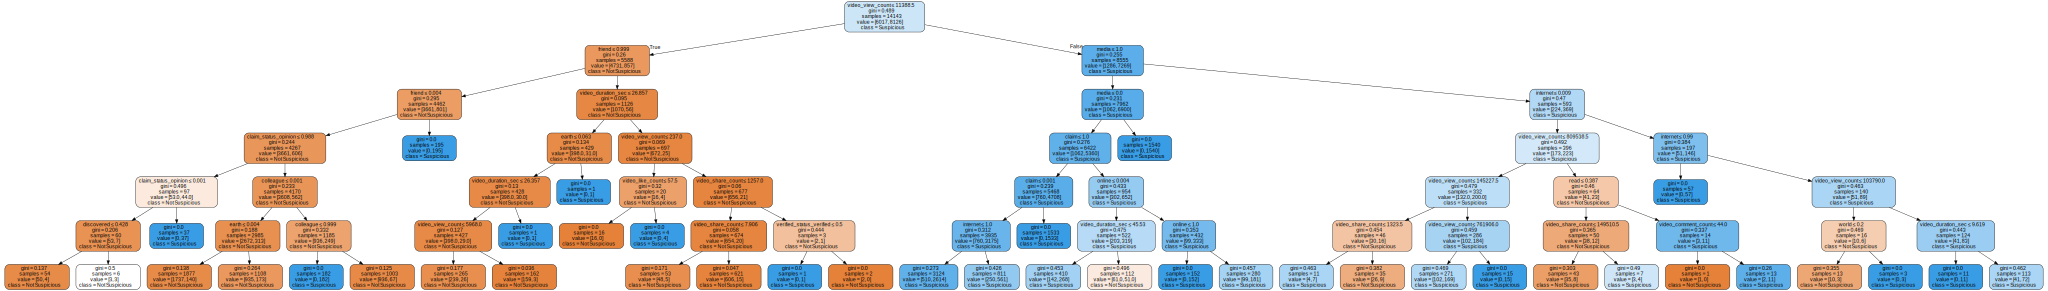

In [105]:

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

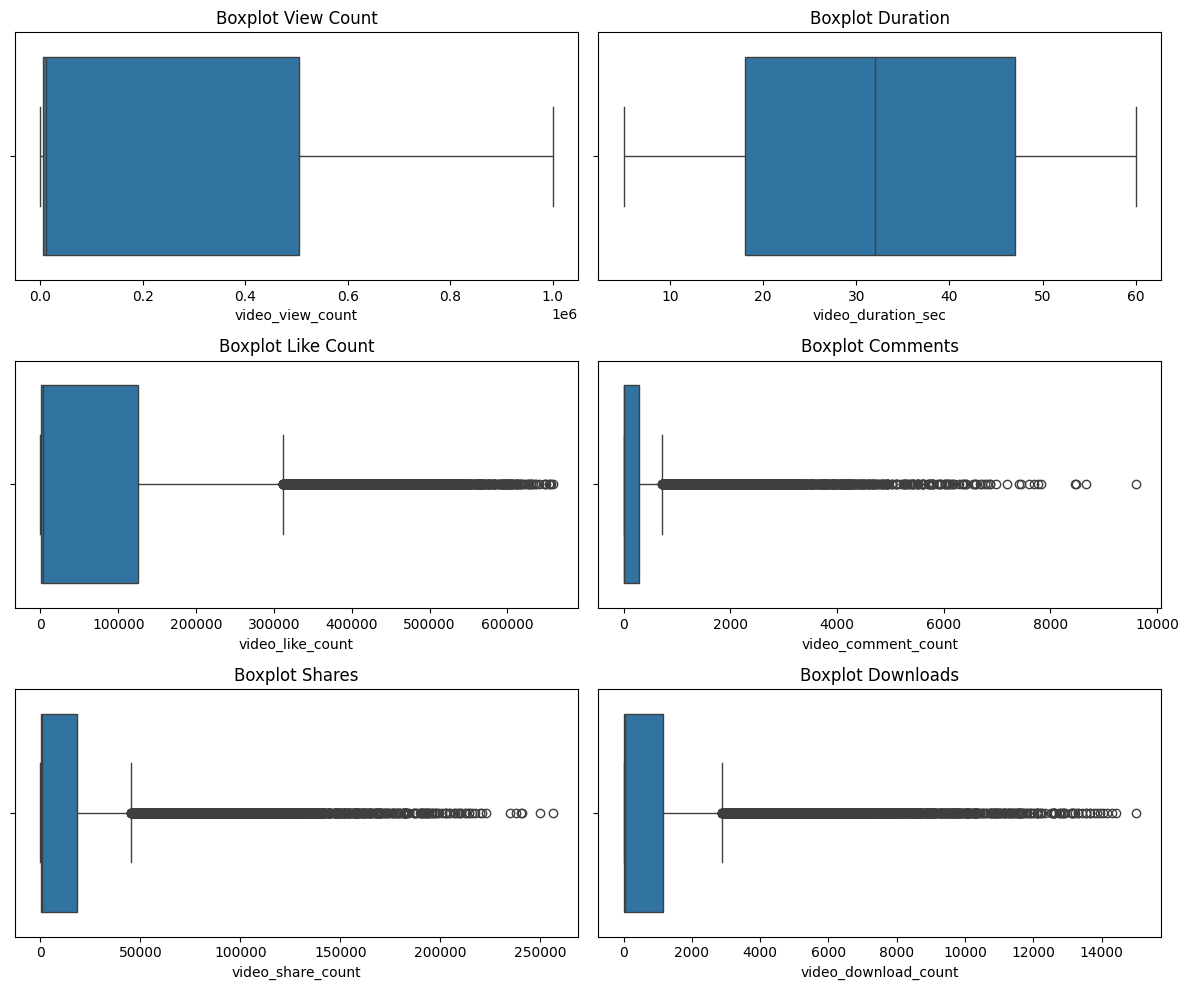

In [108]:


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

columns = [
    'video_view_count', 'video_duration_sec', 'video_like_count',
    'video_comment_count', 'video_share_count', 'video_download_count'
]
titles = [
    'Boxplot View Count', 'Boxplot Duration', 'Boxplot Like Count',
    'Boxplot Comments', 'Boxplot Shares', 'Boxplot Downloads'
]

for i, ax in enumerate(axes):
    if i < len(columns): # Check if the index is within the range of your data
        sns.boxplot(x=tiktok_dataset[columns[i]], ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel(columns[i]) # Add x-axis labels for clarity
    else:
        fig.delaxes(ax) # Remove empty subplots if any
        
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

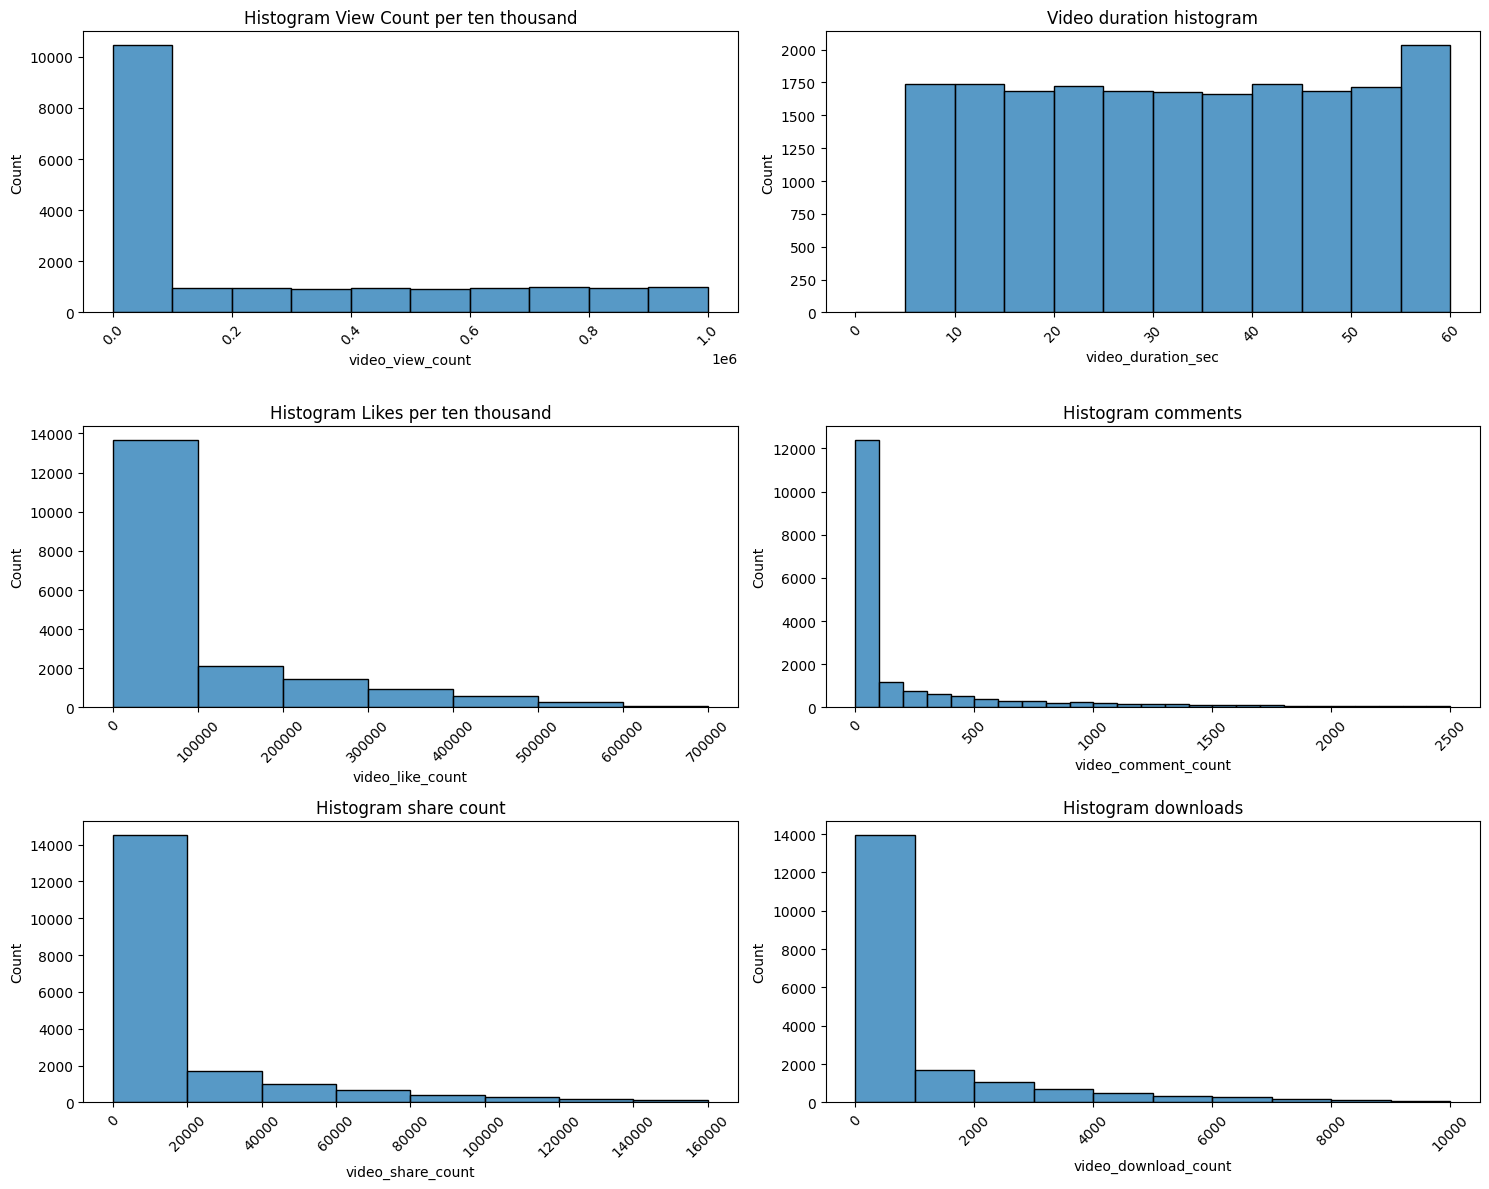

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))  # Adjust figsize as needed
axes = axes.flatten()

columns = [
    'video_view_count', 'video_duration_sec', 'video_like_count',
    'video_comment_count', 'video_share_count', 'video_download_count'
]
titles = [
    'Histogram View Count per ten thousand', 'Video duration histogram',
    'Histogram Likes per ten thousand', 'Histogram comments',
    'Histogram share count', 'Histogram downloads'
]
bins_list = [
    range(0, (10**6 + 1), 10**5), range(0, 61, 5),
    range(0, (7 * 10**5 + 1), 10**5), range(0, 2501, 100),
    range(0, 170001, 20000), range(0, 10001, 1000)
]

for i, ax in enumerate(axes):
    sns.histplot(tiktok_dataset[columns[i]], bins=bins_list[i], ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])  # Add x-axis labels
    ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()


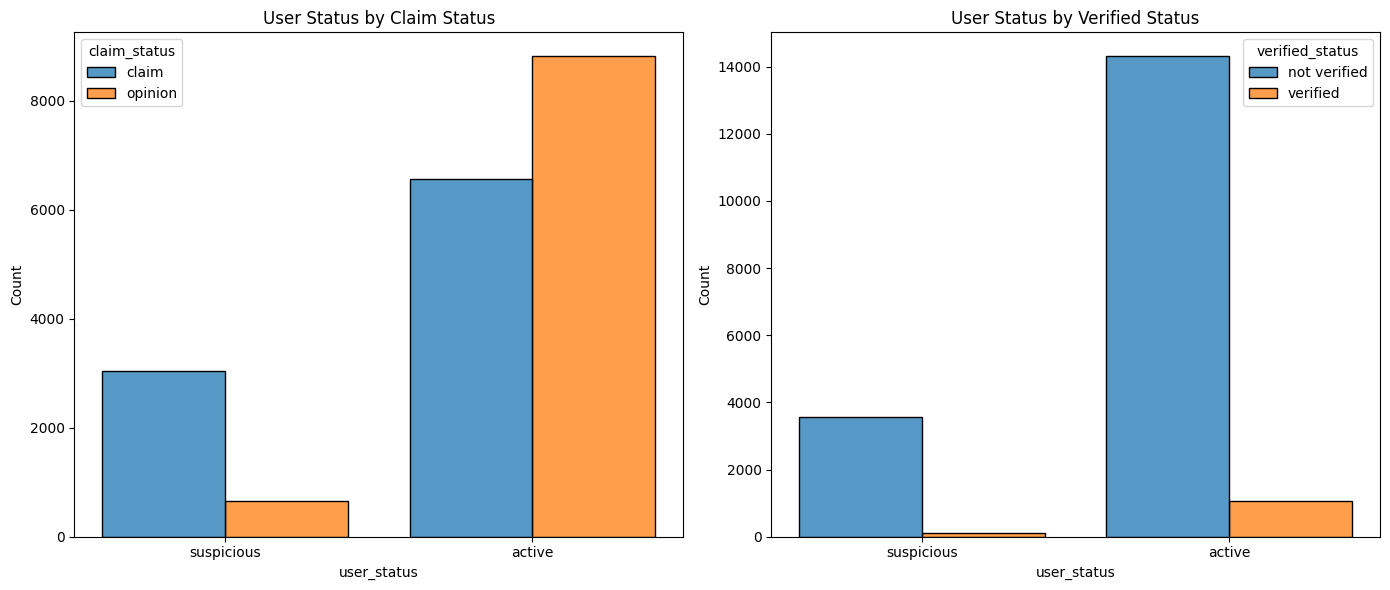

In [109]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # 1 row, 2 columns

# Plot 1: user_status by claim_status
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='claim_status',
             multiple='dodge',
             shrink=0.8, # Slightly smaller shrink for better spacing
             ax=axes[0]) # Use the first subplot
axes[0].set_title('User Status by Claim Status')

# Plot 2: user_status by verified_status
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.8, # Consistent shrink value
             ax=axes[1]) # Use the second subplot
axes[1].set_title('User Status by Verified Status')

plt.tight_layout() # Essential for preventing overlapping titles
plt.show()